# Presentation plots

This notebook contains plots relevant for the final presentation of this project

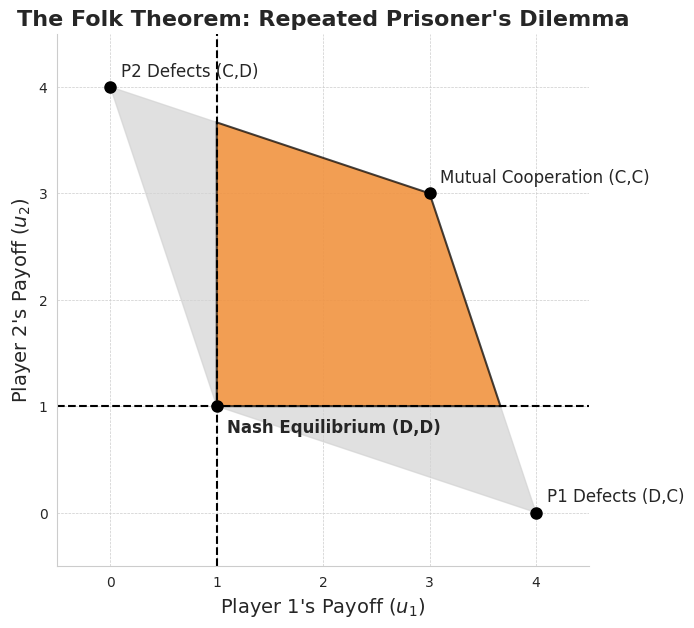

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

# Define the payoff points for the Prisoner's Dilemma
payoffs = {
    "Mutual Cooperation (C,C)": (3, 3),
    "Nash Equilibrium (D,D)": (1, 1),
    "P1 Defects (D,C)": (4, 0),
    "P2 Defects (C,D)": (0, 4),
}

# Create the plot
fig, ax = plt.subplots(figsize=(7, 7))

# 1. Plot the Feasible Payoff Set
feasible_vertices = np.array(
    [
        payoffs["Nash Equilibrium (D,D)"],
        payoffs["P1 Defects (D,C)"],
        payoffs["Mutual Cooperation (C,C)"],
        payoffs["P2 Defects (C,D)"],
    ]
)
feasible_poly = Polygon(
    feasible_vertices,
    closed=True,
    color="lightgray",
    alpha=0.7,
    label="Feasible Payoffs",
)
ax.add_patch(feasible_poly)

# 2. Plot the Folk Theorem Area (feasible AND individually rational)
# Correct vertices: only points where BOTH players get ≥ their minmax payoff (1)
folk_vertices = np.array(
    [
        (1, 1),  # Nash equilibrium
        (11 / 3, 1),  # Where edge (4,0)-(3,3) intersects u2=1
        (3, 3),  # Mutual cooperation
        (1, 11 / 3),  # Where edge (3,3)-(0,4) intersects u1=1
    ]
)

folk_poly = Polygon(
    folk_vertices,
    closed=True,
    color="#fa8218",
    alpha=0.7,
    ec="black",
    lw=1.5,
    label="Folk Theorem Equilibrium Set",
)
ax.add_patch(folk_poly)

# 3. Plot the specific payoff points
for label, (x, y) in payoffs.items():
    ax.plot(x, y, "o", color="black", markersize=8)
    if label == "Nash Equilibrium (D,D)":
        ax.text(x + 0.1, y - 0.25, label, fontsize=12, weight="bold")
    else:
        ax.text(x + 0.1, y + 0.1, label, fontsize=12)

# 4. Plot the Individual Rationality constraints
ax.axvline(
    x=1,
    color="k",
    linestyle="--",
    linewidth=1.5,
    label="Player 1 Minmax Payoff ($v_1^{minmax}$)",
)
ax.axhline(
    y=1,
    color="k",
    linestyle="--",
    linewidth=1.5,
    label="Player 2 Minmax Payoff ($v_2^{minmax}$)",
)

# 5. Styling
ax.set_xlabel("Player 1's Payoff ($u_1$)", fontsize=14)
ax.set_ylabel("Player 2's Payoff ($u_2$)", fontsize=14)
ax.set_title(
    "The Folk Theorem: Repeated Prisoner's Dilemma", fontsize=16, weight="bold"
)
ax.grid(True, which="both", linestyle="--", linewidth=0.5)
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(-0.5, 4.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_aspect("equal", adjustable="box")

plt.tight_layout()
plt.savefig("../latex/slides_pricing_collusion/imgs/ft_plot.pdf")
plt.show()